# COGS 118B - Final Project

# Finding Waldo 

## Group members

- Lillian Wood
- Taha Alam
- Zichen "Cardiff" Jiang
- Will Lutz
- Sara Shao

# Introduction
For ages, people around the world have been asking the question, "Where's Waldo?" As humans, we know Waldo from his glasses and a red and white striped shirt and hat. Even though Waldo has become an iconic image, "Where's Waldo?" puzzles are no easier to solve. They are well-designed to hide Waldo from the human eye. In our project, we attempt to find Waldo through a less traditional method. We will perform PCA on images of the character, Waldo, from Where’s Waldo to identify whether or not a test image is a picture of Waldo.

Utilizing a dataset of colored images of Waldo, we will reduce the dimensionality of the vectorized images by calculating the eigenvalues and eigenvectors of the original image to reconstruct an image of Waldo in a smaller subspace. Once the eigenface is constructed using all of the principal components, we will be able to calculate the Euclidean distance between this constructed image and test images of both Waldo and non-Waldo projected into the same subspace to identify if the image is a picture of Waldo. The goal of this project is to elaborate on the topic of PCA that was discussed in class and present it in a fun and interactive way.

This project is significant because finding Waldo manually can be extremely tricky and time-consuming, sometimes ranging. Therefore, this intuitive PCA method to automatically find Waldo could be a handy way to find the solution to these puzzles when they are too tricky to solve by the human eye.

# Related Work

Our project is based on the PCA example presented in class and in the homework. We will take the same steps to create the eigenfaces of our training and test sets of images. Once we create the eigenfaces for Waldo, we will follow the methods described in Liton Chandra Paul and Abdulla Al Sumam (2012) <a name="relatedwork"></a> [1](#relatedwork) in order to calculate the distance between the eigenfaces of the test images and the eigenfaces of the training images when projected into the subspace. 

We also developed our ideas for this project by building off of related work in order to create an original functioning model. For example, Wagner et al. (2013) used PCA as an initial filter kernel for a Convolutional Network. Also, the github repo "HereIsWally" uses CNN to successfully find Waldo. 

# Methods
Briefly, we collected 22 Waldo images and put these 22 column vectors into a matrix. PCA will be done using these 22 images to make our eigenfaces. We tested if reconstruction of an existing face works well through reconstruction distance calculation. Then we tested if reconstruction of a new Waldo image works. Lastly, we used a puzzle, divided it to equal sized boxes, and used PCA to find the box that has Waldo's face in it.

### Collecting images
##### Training 
We collected images from various sources, including https://www.localguidesconnect.com/t5/General-Discussion/Alert-Answers-included-Waldo-Answers-if-you-guys-are-struggling/td-p/722677, https://petitefoxdesigns.wordpress.com/2015/11/05/wheres-waldo-wednesday-in-town/, https://github.com/wirooo/FolloWaldo, and so on. We whimsically selected some images from these websites, downloaded them, and manually croped them to a square where the tip of Waldo's right ear and Waldo's left cheekbone are roughly aligned at the same coordinates across cropped images. These images are named 1 to 22.jpg in `waldo_manual/`.

##### Testing
1. A Waldo image from the 22 images
2. Redo PCA after removing one of the 22 images, and reconstruct this removed iamge
3. Two non-Waldo images
4. A small puzzle cropped from a whole scene.

### Vectorizing Images
Each manually cropped images that roughly align with each other are of different pixel sizes, so we used `myimage.resize((x, x))` to resize each image to the same dimension so that the column vector representation of each image has the same size. 22 Waldo images are used to form the input matrix that will be used to generate our eigenfaces. These are first opened using Python Imaging Library (PIL) to open the image, resize the image, turn into a matrix, flatten the matrix to a row vector, transpose to a column vector, add the column to `data` matrix. See code below.

### PCA
PCA follows the exact same code as from lecture slides and homework. See code below.

### Reconstruction Distance Function
Explaination

# Results
Results - What did you discover? How well did it work?  As this is a class project, it is likely that many things did not work as well as planned.  For this project, detailing what went wrong is as important as describing what went well.  (approx 7 points)

### Preparing the images

In [5]:
import numpy as np
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize
import time
from PIL import Image
import random
%matplotlib inline
import pandas as pd
import os

In [6]:
# Ex. waldo_matrix = vectorize(100, 21, 'waldo_manual')
# 22 Waldo pictures are turned into a 30000 by 1 (100 pixel x 100 pixel x 3) column vector. So each col of this 40000 by 22 matrix is one of the pictures.
def vectorize(pixel, pic_num, pic_dir):
    pic_dim = pixel * pixel * 3
    A = np.empty([pic_dim, pic_num])

    file_ls = []
    for filename in os.listdir(pic_dir):
        f = os.path.join(pic_dir, filename)
        file_ls.append(f)

    for i in range(len(file_ls)):
        f = file_ls[i]
        print(f)
        img = Image.open(f).convert('RGB')
        img_resized = img.resize((pixel, pixel))
        arr = np.array(img_resized)
        flat_arr = arr.ravel()
        v = np.matrix(flat_arr)
        col_v = v.T
        A[:, i][:, np.newaxis] = col_v
        i += 1
    return A

In [7]:
# Ex. viewimage(waldo_input[:, 8], pixel)
def viewimage(vector, pixel):
    # Showing the 8th picture from the matrix
    vector_uint8 = vector.astype(np.uint8)
    shape = (pixel, pixel, 3)
    reconstruct_arr = np.asarray(vector_uint8).reshape(shape)
    reconstruct_img = Image.fromarray(reconstruct_arr, 'RGB')
    reconstruct_img.show()

In [8]:
pixel = 100
num = 28
data = vectorize(pixel, num, 'waldo_manual')
data.shape

waldo_manual/8.jpg
waldo_manual/9.jpg
waldo_manual/14.jpg
waldo_manual/28.jpg
waldo_manual/15.jpg
waldo_manual/17.jpg
waldo_manual/16.jpg
waldo_manual/12.jpg
waldo_manual/13.jpg
waldo_manual/11.jpg
waldo_manual/10.jpg
waldo_manual/21.jpg
waldo_manual/20.jpg
waldo_manual/22.jpg
waldo_manual/23.jpg
waldo_manual/27.jpg
waldo_manual/26.jpg
waldo_manual/18.jpg
waldo_manual/24.jpg
waldo_manual/25.jpg
waldo_manual/19.jpg
waldo_manual/4.jpg
waldo_manual/5.jpg
waldo_manual/7.jpg
waldo_manual/6.jpg
waldo_manual/2.jpg
waldo_manual/3.jpg
waldo_manual/1.jpg


(30000, 28)

### PCA

In [9]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort

In [10]:
# normc(M) normalizes the columns of M to a length of 1.
def normc(Mat):
    return normalize(Mat, norm='l2', axis=0)

In [11]:
meanface = np.mean(data, axis=1)
meanface = meanface[:, np.newaxis]
meanface

array([[172.07142857],
       [177.75      ],
       [153.71428571],
       ...,
       [183.35714286],
       [161.17857143],
       [152.89285714]])

In [12]:
(np.matlib.repmat(meanface, 1, num)).shape

(30000, 28)

In [13]:
data.shape

(30000, 28)

In [14]:
# Subtract the mean from all of the data (using the command numpy.matlib.repmat), and call the matrix of mean-subtracted data A
A = data - np.matlib.repmat(meanface, 1, num)

In [15]:
eigvals, Vold = np.linalg.eig(A.T.dot(A))

In [16]:
V, D = eigsort(Vold, eigvals)

In [17]:
U = A.dot(V)

#then normalize
U = normc(U)
U.shape

(30000, 28)

In [18]:
#PCA
C = U.T.dot(data - meanface)

### Reconstruction distance calculation

In [19]:
# Ex. dist(data[:, i][:, np.newaxis], xhat)
#   original is flattened col vector of a face
def dist(original, reconstruction):
    # return np.sum((original - reconstruction)**2)
    return np.linalg.norm(reconstruction - original, axis=0)

In [20]:
# reconstruct a randomly chosen Waldo image from the input matrix "data"
i = random.randint(0, num-1)
viewimage(data[:, i], pixel)
# plt.savefig("result/1_1_an_existing_to_reconstruct.jpg")

<Figure size 640x480 with 0 Axes>

In [21]:
c=C[:,i][:, np.newaxis]
xhat=U.dot(c) + meanface
viewimage(xhat, pixel)
# plt.savefig("result/1_2_reconstructed_existing.jpg")

<Figure size 640x480 with 0 Axes>

In [22]:
original = data[:, i][:, np.newaxis]
reconstruct_dist = dist(original, xhat)
reconstruct_dist

array([2981.24550374])

### Reconstruct after removing the 6th Waldo image

In [23]:
viewimage(data[:,i], pixel) # i is randomly chosen in the above section
# plt.savefig("result/2_1_new_to_reconstruct.jpg")

<Figure size 640x480 with 0 Axes>

In [24]:
newfaces = np.delete(data,np.s_[i],axis=1) 
newmeanface = np.mean(newfaces, axis=1, keepdims = True)
A2 = newfaces - newmeanface

eigvals2, Vold2 = np.linalg.eig(A2.T.dot(A2))
V2, D2 = eigsort(Vold2, eigvals2)
U2 = A2 @ V2
U2 = normc(U2)
c2 = U2.T.dot(data[:,i][:, np.newaxis] - meanface)
xhat2 = U2.dot(c2) + meanface
viewimage(xhat2, pixel)
# plt.savefig("result/2_2_reconstructed_new.jpg")

<Figure size 640x480 with 0 Axes>

In [25]:
original = data[:, i][:, np.newaxis]
reconstruct_missing_image_dist = dist(original, xhat2)
diff = reconstruct_missing_image_dist-reconstruct_dist
print("reconstruct_missing_image_dist - reconstruct_dist =", diff, "\nreconstruct_missing_image_dist > reconstruct_dist")

reconstruct_missing_image_dist - reconstruct_dist = [9202.20822467] 
reconstruct_missing_image_dist > reconstruct_dist


### Reconstruct a non-Waldo image

In [26]:
f = 'non_waldo_manual/red.jpg'
img = Image.open(f).convert('RGB')
img_resized = img.resize((pixel, pixel))
arr = np.array(img_resized)
flat_arr = arr.ravel()
v = np.matrix(flat_arr)
nonWaldo = v.T
viewimage(nonWaldo, pixel)
# plt.savefig("result/3_1_red_shirt_to_reconstruct.jpg")

c3 = U.T.dot(nonWaldo - meanface)
xhat3 = U.dot(c3) + meanface
viewimage(xhat3, pixel)
# plt.savefig("result/3_2_reconstructed_red_shirt.jpg")
reconstruct_red_dist = dist(original, xhat3)

In [27]:
f = 'non_waldo_manual/glasses.jpg'
img = Image.open(f).convert('RGB')
img_resized = img.resize((pixel, pixel))
arr = np.array(img_resized)
flat_arr = arr.ravel()
v = np.matrix(flat_arr)
nonWaldo = v.T
viewimage(nonWaldo, pixel)
# plt.savefig("result/4_1_glasses_to_reconstruct.jpg")

c4 = U.T.dot(nonWaldo - meanface)
xhat4 = U.dot(c4) + meanface
viewimage(xhat4, pixel)
# plt.savefig("result/4_2_reconstructed_glasses.jpg")
reconstruct_glasses_dist = dist(original, xhat4)

In [28]:
print(reconstruct_dist, reconstruct_missing_image_dist, reconstruct_red_dist, reconstruct_glasses_dist)

[2981.24550374] [12183.45372842] [18125.33871673] [19352.67263895]


### Finding Waldo in a puzzle

In [29]:
# the puzzle image is 500 by 500, breaking the puzzle image to 5 boxes length-/ row-wise and 5 boxes width-/ column-wise, so each is 100 by 100
# the box with Waldo in it is aligned similar to how the training images are done
f = 'puzzle_test/test.jpg'
puzzle_pixel = 500
img = Image.open(f).convert('RGB')
img_resized = img.resize((puzzle_pixel, puzzle_pixel))
arr = np.array(img_resized)

box_ls = []
row_ls = [0, 100, 200, 300, 400, 500]
col_ls = [0, 100, 200, 300, 400, 500]
for i in range(5):
    for j in range(5):
        box = arr[row_ls[i]:row_ls[i+1], row_ls[j]:row_ls[j+1]]
        box_ls.append(box)

4.1 9734.322308429182


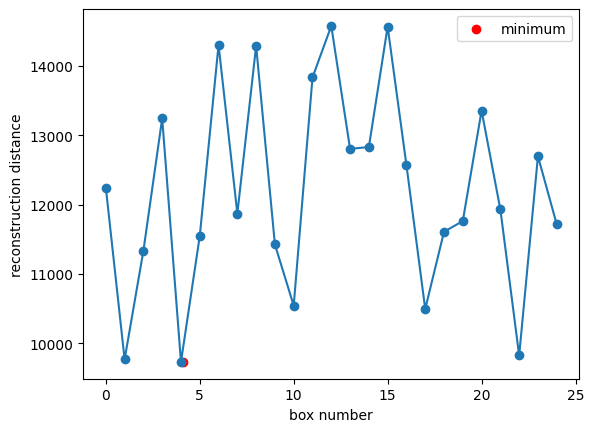

In [30]:
# 19 is Waldo
dist_ls = []
for i in range(25):
    flat_arr = box_ls[i].ravel()
    v = np.matrix(flat_arr)
    box_v = v.T
    # viewimage(box_v, pixel)
    c5 = U.T.dot(box_v - meanface)
    xhat5 = U.dot(c5) + meanface
    # viewimage(xhat5, pixel)
    # sprint(box_v.shape, xhat5.shape)
    euclidean_dist = dist(box_v, xhat5)
    # dist_ls.append(np.linalg.norm(xhat5 - box_v))
    dist_ls.append(euclidean_dist)


data = {'box': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24],
        'recon_dist': dist_ls}
df = pd.DataFrame(data)

min_x = np.argmin(data['recon_dist'])+0.1
min_y = np.min(data['recon_dist'])
plt.plot(df['box'], df['recon_dist'], marker='o');
plt.scatter(min_x, min_y,c='r', label='minimum');
plt.legend();
plt.ylabel('reconstruction distance');
plt.xlabel('box number');
print(min_x, min_y)

In [31]:
i = 4
flat_arr = box_ls[i].ravel()
v = np.matrix(flat_arr)
box_v = v.T
# viewimage(box_v, pixel)
c6 = U.T.dot(box_v - meanface)
xhat6 = U.dot(c6) + meanface
# viewimage(xhat6, pixel)
reconstruct_4th_box_dist = dist(original, xhat6)
reconstruct_4th_box_dist

array([16364.55431306])

In [32]:
i = 19
flat_arr = box_ls[i].ravel()
v = np.matrix(flat_arr)
box_v = v.T
viewimage(box_v, pixel)
# plt.savefig("result/5_1_waldo_in_the_puzzle.jpg")
c7 = U.T.dot(box_v - meanface)
xhat7 = U.dot(c7) + meanface
viewimage(xhat7, pixel)
# plt.savefig("result/5_2_reconstructed_waldo_in_the_puzzle.jpg")
reconstruct_19th_box_dist = dist(original, xhat7)
reconstruct_19th_box_dist

array([17662.27019932])

# Discussion 
Overall, our model for Finding Waldo did not work as planned. We attempted an original approach to explore how applying Principal Component Analysis (PCA) would impact our results compared to previous related work (HereIsWally, Wagner et al.). Unfortunately, our algorithm did not find Waldo, most likely due to certain limitations.  

### Limitations
In total, we encountered two main limitations. The first was the challenge to collect viable Where's Waldo images. During our efforts, we realized that many Where's Waldo images on the internet range in size, alignment, and resolution. Also, there was the difficulty of either finding Waldo ourselves or researching the solutions. With these challenges, we had a difficult time collecting enough images. We also found that our model would have a difficult time with images where Waldo was not positioned with a similar alignment to our reconstructed image of Waldo. For this reason, we were only able to apply our model to an image where Waldo was in similar alignment and size.

The second limitation was lack of time. Had we had more time to find better images, do further training on the model, and tweak our model to perform better, we believe our model would have been successful in finding Waldo. We were also curious to explore the idea of using convolutional networks, such as in Wagner et al. 2013, but we did not have the time.

### Comparison to Related Work
In comparison to related works such as Wagner et al. and HereIsWally, our model was not a success. Although our model is built off of ideas from these works, our approach may have been to simplistic. Considering that using CNN has successfully found Waldo in other projects, using a convolutional network may help our model perform better (HereIsWally).

### Future Improvements
More time would be necessary to make our model work as intended. If we were to change anything, we would first work to build a much larger collection of Waldo images. We would aim for better-quality, higher resolution, and more diverse Waldo photos to improve the function of reconstruction. 

Instead of splitting the original image into boxes to run reconstruction on, we would try using convolutional networks. We hope that this would alleviate the problem of Waldo's differing alignment within the boxes, since the convolutional network works as a slider.

# Author Contribution
| Task      | Assignee |
| ----------- | ----------- |
| Introduction writing     | Will       |
| Related Work writing  | Will        |
| Footnotes citation  | Lillian        |
| Finding puzzles with answers and cropping out Waldo | Cardiff and Lillian        |
| Vectorizing Images and methods writing   | Cardiff        |
| PCA and methods writing      | Sara and Cardiff      |
| Reconstruction Distance Function and methods writing   | Lillian and Taha and Cardiff        |
| Comparison to Related Work writing      |    Lillian    |
| Discussion writing  |  all     |
| Editing | all |
| Final review | Lillian |

# Footnotes

<a name="relatedwork"></a>1.[^](#relatedwork): last name, first name. (year). name of article. article link<br>